
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

![title](https://imgs.xkcd.com/comics/beer_2x.png)

In [1]:
import pandas as pd

## Load the data into a DataFrame
df = pd.read_csv('../iowa_liquor_sales_proj_2.csv')

## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")#big 'Y' for 4 digit date

C:\Users\rdame\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.sort_values(by = 'Date', inplace = True)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.info() #looks likesome Nulls in County and county number. lets use either city and or zipcode and see how much each
#city/zipcode sold
#change all prices into floats.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709552 entries, 695077 to 2709551
Data columns (total 24 columns):
Invoice/Item Number      object
Date                     datetime64[ns]
Store Number             int64
Store Name               object
Address                  object
City                     object
Zip Code                 object
Store Location           object
County Number            float64
County                   object
Category                 float64
Category Name            object
Vendor Number            int64
Vendor Name              object
Item Number              int64
Item Description         object
Pack                     int64
Bottle Volume (ml)       int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold             int64
Sale (Dollars)           object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(13)
memory usage: 516.8+ MB


In [4]:
#Sales is stored as a non numeric object, so lets get rid of the dollar sign and store it as a float
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('$', '').astype('float64')
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('$', '').astype('float64')
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('$', '').astype('float64')

In [5]:
df.info() #confirming we price columns to floats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709552 entries, 695077 to 2709551
Data columns (total 24 columns):
Invoice/Item Number      object
Date                     datetime64[ns]
Store Number             int64
Store Name               object
Address                  object
City                     object
Zip Code                 object
Store Location           object
County Number            float64
County                   object
Category                 float64
Category Name            object
Vendor Number            int64
Vendor Name              object
Item Number              int64
Item Description         object
Pack                     int64
Bottle Volume (ml)       int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold             int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: datetime64[ns](1), float64(7), int64(6), object(10)
memory usage: 516.8+ MB


In [6]:
df['City'] = df['City'].map(lambda x: x.upper())

In [7]:
# i saw some of the cities were mispelled, in the long run this probably wont make a difference but i renamed them anways.
df['City'] = df['City'].map(lambda x: x.replace('MT','MOUNT') if x[0] == 'M' else x)
df['City'] = df['City'].map(lambda x: x.replace('ST ','ST. ') if x[0] == 'S' else x)
df['City'] = df['City'].map(lambda x: x.replace('OTTUWMA','OTTUMWA') if x == 'OTTUWMA' else x)
df['City'] = df['City'].map(lambda x: x.replace('LEMARS','LE MARS') if x == 'LEMARS' else x)
df['City'] = df['City'].map(lambda x: x.replace('LECLAIRE','LE CLAIRE') if x == 'LECLAIRE' else x)
df['City'] = df['City'].map(lambda x: x.replace('GUTTENBURG','GUTTENBERG') if x == 'GUTTENBURG' else x)


In [8]:
#but first lets sort by date and see over what timespan the data was collected
min(df.Date), max(df.Date) #January 5, 2015 to March 31, 2016

(Timestamp('2015-01-05 00:00:00'), Timestamp('2016-03-31 00:00:00'))

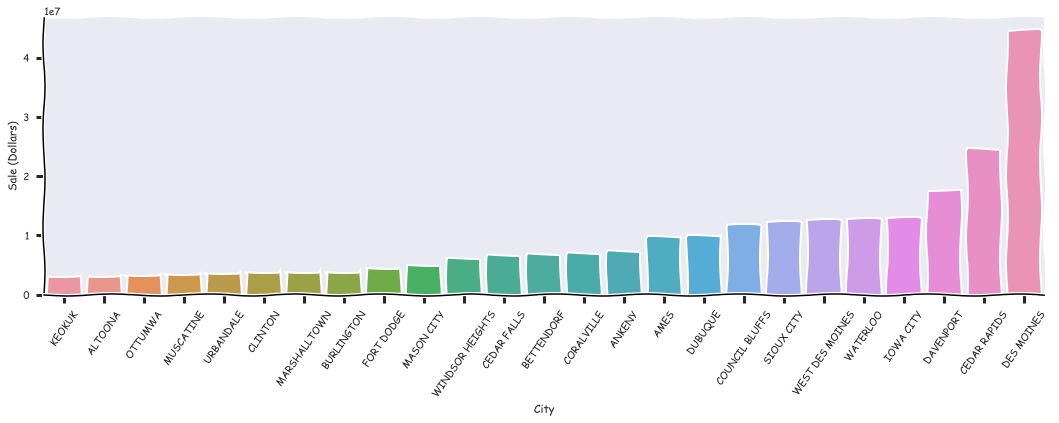

In [97]:
#lets plot the cities with the top 25 total sales
g = sns.factorplot(x= 'City', y = 'Sale (Dollars)',
                   kind = 'bar',
                   data = df.groupby('City')[['Sale (Dollars)']].sum().sort_values(by = 'Sale (Dollars)').reset_index().tail(25),
                   size = 5,
                   aspect = 3,
                   palette = None,)
g.set_xticklabels(rotation = 55)



In [10]:
#lets try and look at the best performing stores by city 
df.groupby(['City','Store Number'])[['Sale (Dollars)']].sum().sort_values(by = 'Sale (Dollars)', ascending = False)

Sale (Dollars)
City            Store Number                
DES MOINES      2633             12282646.26
                4829             11085530.53
IOWA CITY       2512              5206377.22
CEDAR RAPIDS    3385              4759187.79
WINDSOR HEIGHTS 3420              4018414.55
BETTENDORF      3952              3768333.09
WEST DES MOINES 3814              3365204.04
CORALVILLE      2670              3015679.96
CEDAR RAPIDS    3773              2948596.43
DAVENPORT       3354              2920466.95
MOUNT VERNON    5102              2557579.26
DAVENPORT       2625              2399216.50
SIOUX CITY      3447              2380193.90
DUBUQUE         4167              2346190.58
WATERLOO        3494              2189165.60
AMES            3524              2048850.65
COUNCIL BLUFFS  2629              2009175.89
DAVENPORT       2614              2003270.50
CARROLL         2593              1981636.04
SIOUX CITY      3820              1978407.16
WEST DES MOINES 2648              1977218.38
CLINTON         2616              1947756.37
WEST DES MOINES 2619              1939138.09
URBANDALE       2663              1868749.31
CORALVILLE      4677              1812906.19
CEDAR FALLS     2106              1772173.90
DES MOINES      2561              1750975.52
COUNCIL BLUFFS  4312              1748177.94
BURLINGTON      2506              1743498.14
MARSHALLTOWN    2544              1722256.09
...                                      ...
DES MOINES      5136                 5881.58
GLIDDEN         5205                 5716.18
ROBINS          5192                 4767.12
NORWALK         5229                 4717.13
DAVENPORT       9022                 4643.52
WATERLOO        5152                 4562.76
DAVENPORT       5130                 4474.96
COUNCIL BLUFFS  5195                 4319.69
MONTROSE        5213                 4220.56
WEST BRANCH     5240                 4207.66
GILBERTVILLE    5202                 4207.66
DUBUQUE         5234                 4207.66
                5201                 3778.26
COUNCIL BLUFFS  5161                 3711.58
IOWA CITY       5053                 3694.38
TABOR           5223                 3086.25
AUDUBON         5232                 3086.25
RUNNELLS        5216                 3086.25
PLEASANTVILLE   5233                 3086.25
GRISWOLD        4990                 2884.66
WAPELLO         4121                 2846.31
ANTHON          5228                 2277.72
ROCKWELL        5247                 1853.71
ATLANTIC        5208                 1836.74
BELLE PLAINE    4059                 1813.33
OKOBOJI         4486                 1232.38
URBANDALE       4939                 1120.70
COUNCIL BLUFFS  5056                  973.58
DES MOINES      4567                  827.13
CHARITON        5218                  603.13

[1403 rows x 1 columns]

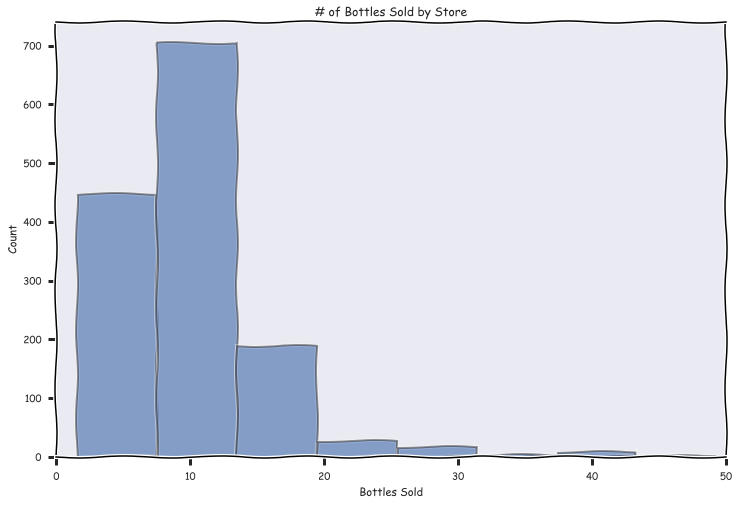

In [49]:

fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlim(xmin = 0, xmax = 50)
plt.xkcd()
sns.distplot(df.groupby('Store Number')['Bottles Sold'].mean(), norm_hist=False, kde = False, hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('# of Bottles Sold by Store')
plt.ylabel('Count')

In [51]:
df.groupby('Store Number')['Bottles Sold'].mean().mean()

10.604507536204743

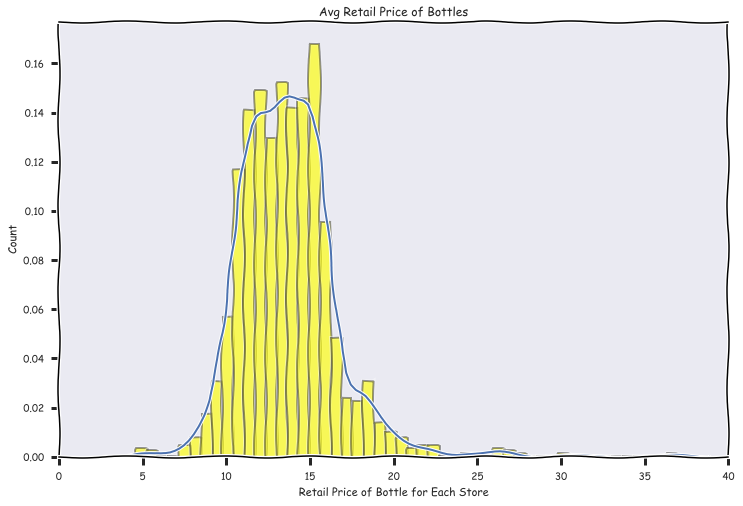

In [112]:
#price of bottles
fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlim(xmin = 0, xmax = 40)
sns.distplot(df.groupby('Store Number')['State Bottle Retail'].mean(), hist_kws= dict(edgecolor="k", linewidth=2, color = 'yellow'), kde = True, norm_hist = False)
plt.title('Avg Retail Price of Bottles')
plt.ylabel('Count')
plt.xlabel('Retail Price of Bottle for Each Store')

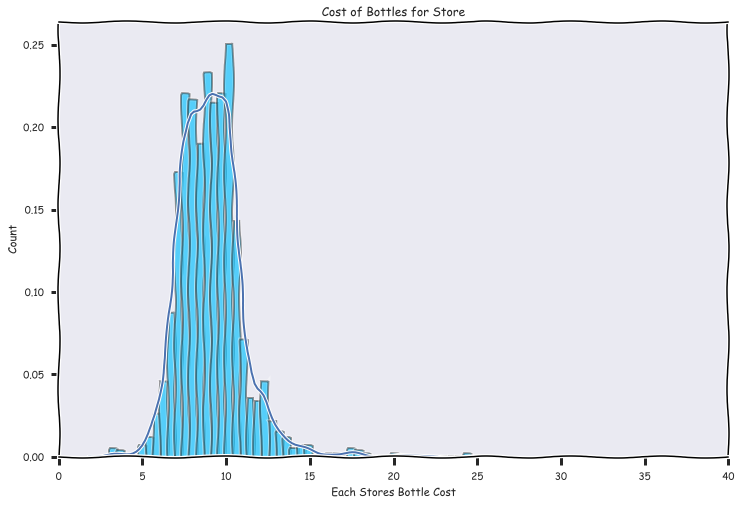

In [113]:
#Cost of bottles
fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlim(xmin = 0, xmax = 40)
sns.distplot(df.groupby('Store Number')['State Bottle Cost'].mean(), hist_kws=dict(edgecolor="k", linewidth=2, color = 'deepskyblue'), kde = True, norm_hist = False)
plt.title('Cost of Bottles for Store')
plt.ylabel('Count')
plt.xlabel('Each Stores Bottle Cost')

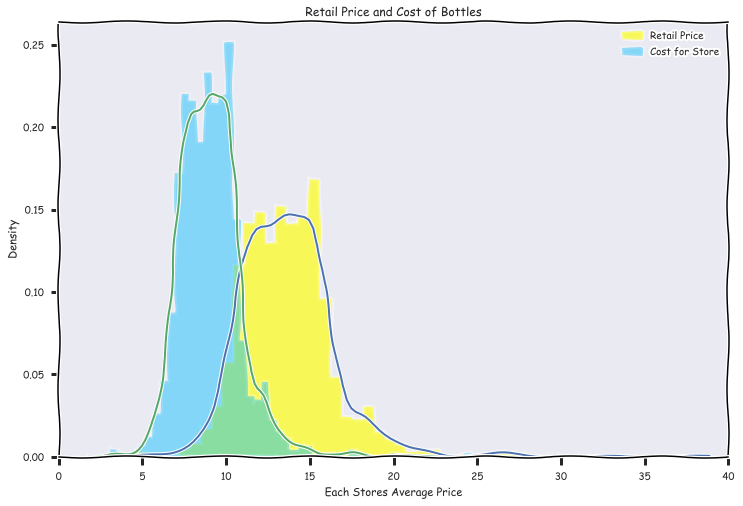

In [115]:

fig, ax = plt.subplots(figsize = (12,8))
#c1, c2, c3 = sns.color_palette("Set1", 3)
ax.set_xlim(xmin = 0, xmax = 40)
plt.xkcd()
sns.distplot(df.groupby('Store Number')['State Bottle Retail'].mean(),
             hist_kws={"histtype": "stepfilled", "color": "yellow"},
             norm_hist = False,
             kde = True,
             ax = ax,
             label = 'Retail Price')

sns.distplot(df.groupby('Store Number')['State Bottle Cost'].mean(),
             hist_kws={"histtype": "stepfilled", "color": "deepskyblue", 'alpha': .25},
             norm_hist = False,
             kde = True,
             ax = ax,
             label = 'Cost for Store')

plt.title('Retail Price and Cost of Bottles')
plt.ylabel('Density')
plt.xlabel('Each Stores Average Price')
plt.legend()

In [53]:
df['State Bottle Retail'].mean(), df['State Bottle Cost'].mean()

(14.740117521272886, 9.8162094287173645)

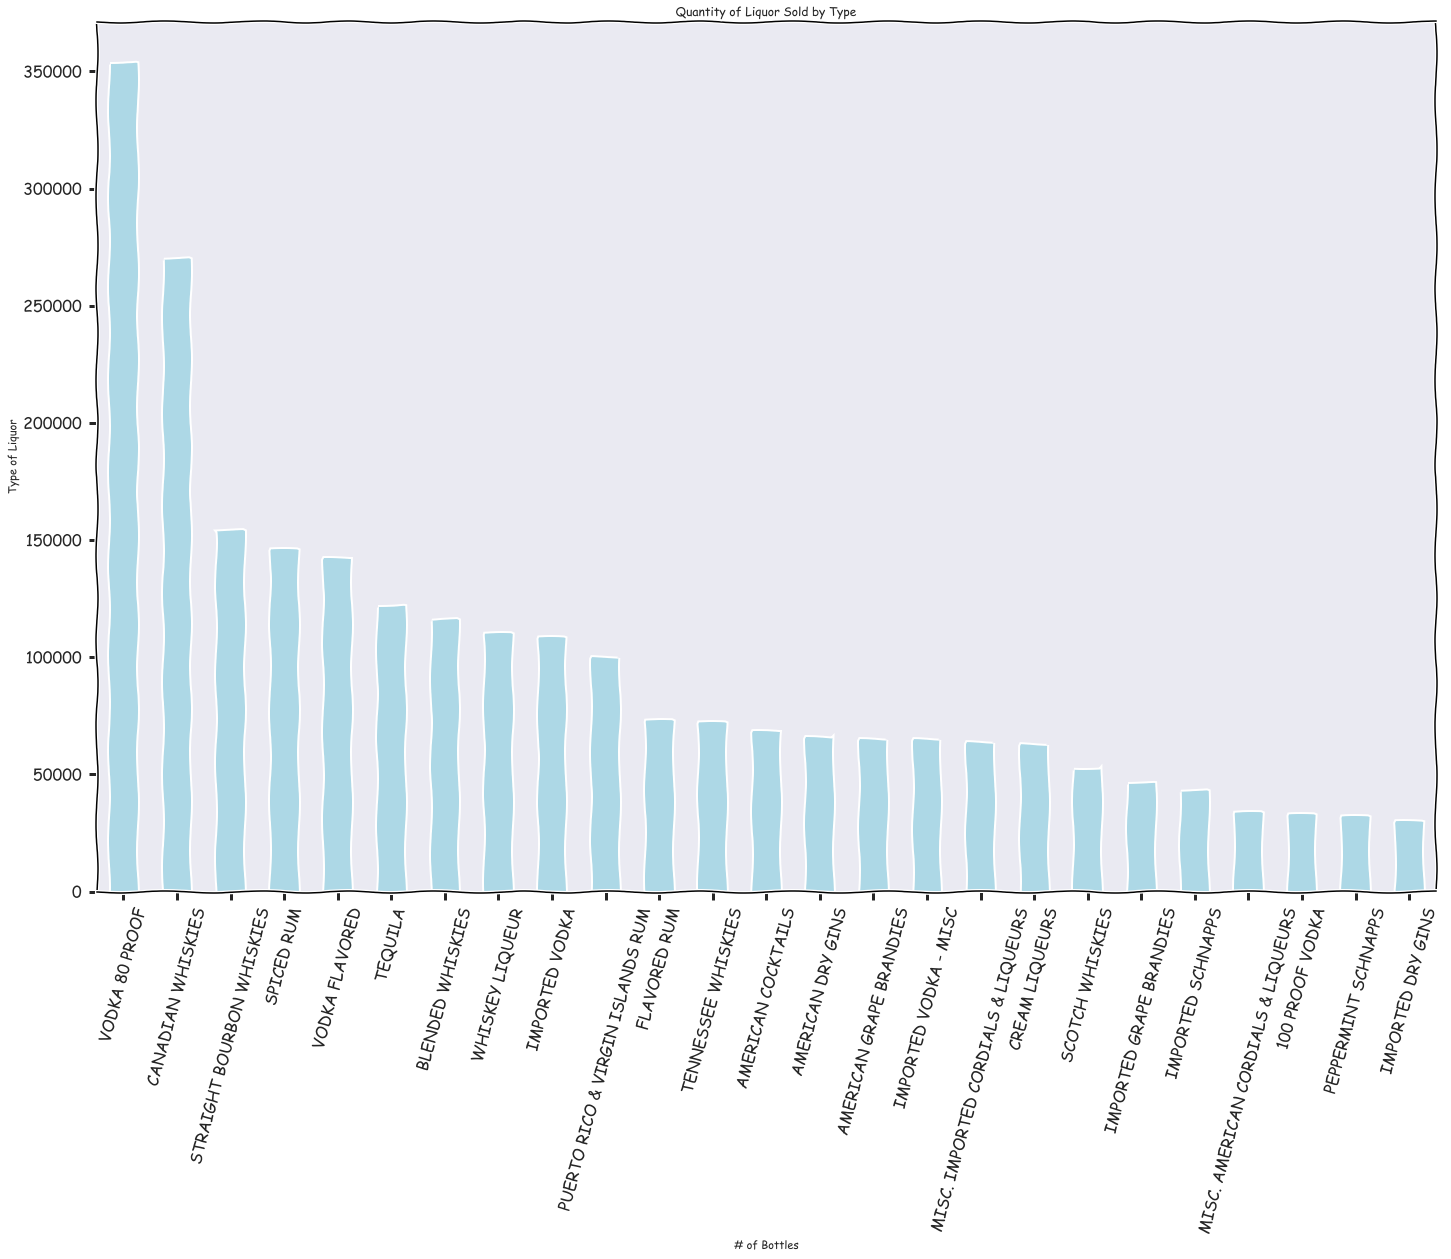

In [116]:
fig, ax = plt.subplots(figsize = (24,16))
df['Category Name'].value_counts().head(25).plot(kind = 'bar', color = 'lightblue', rot = 75, fontsize = 16)

plt.xlabel('# of Bottles')
plt.ylabel('Type of Liquor')
plt.title('Quantity of Liquor Sold by Type')

In [23]:
df.groupby('Category Name')[['State Bottle Retail']].mean().sort_values(by = 'State Bottle Retail', ascending = False)

,State Bottle Retail
Category Name,
CORN WHISKIES,269.082906
HIGH PROOF BEER - AMERICAN,142.760000
JAPANESE WHISKY,52.702248
AMARETTO - IMPORTED,46.700000
SINGLE MALT SCOTCH,46.012337
SINGLE BARREL BOURBON WHISKIES,43.859528
BOTTLED IN BOND BOURBON,28.206263
STRAIGHT RYE WHISKIES,25.947272
IRISH WHISKIES,25.481093


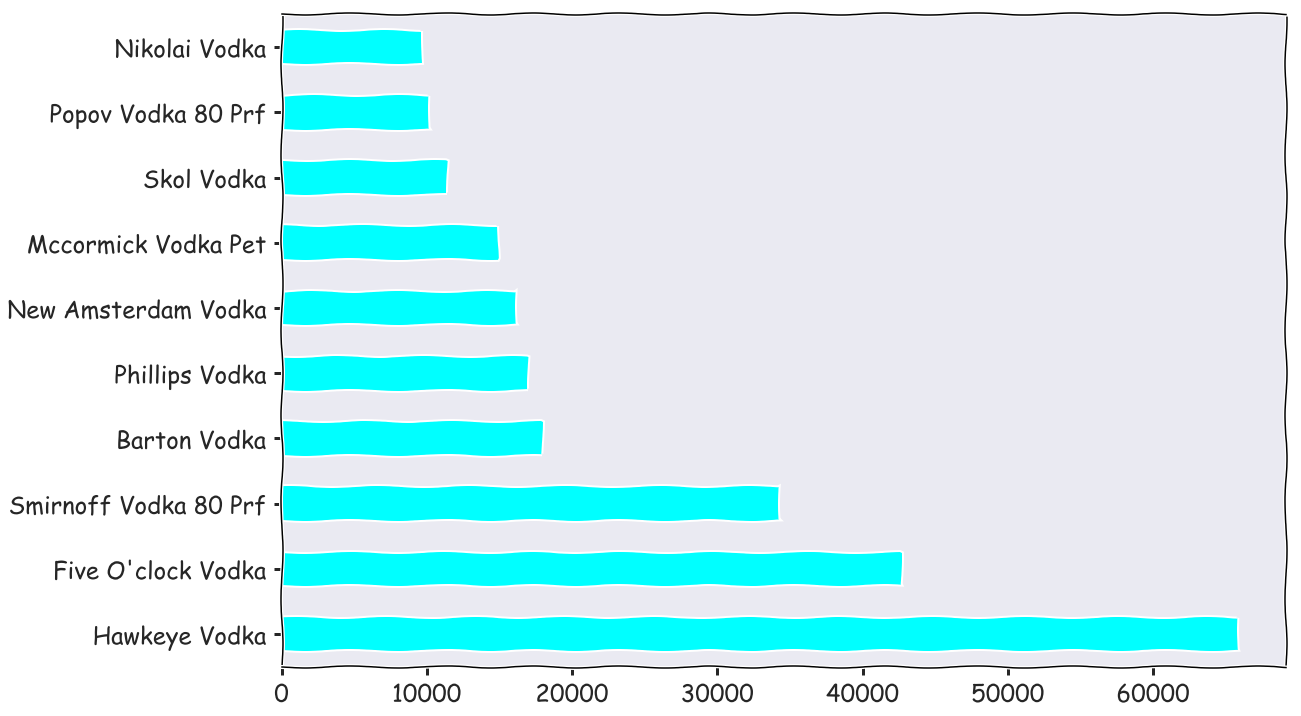

In [29]:
fig, ax = plt.subplots(figsize = (18,12))
df[df['Category Name'] == 'VODKA 80 PROOF']['Item Description'].value_counts().head(10).plot(kind = 'barh', color = 'aqua', fontsize = 24)

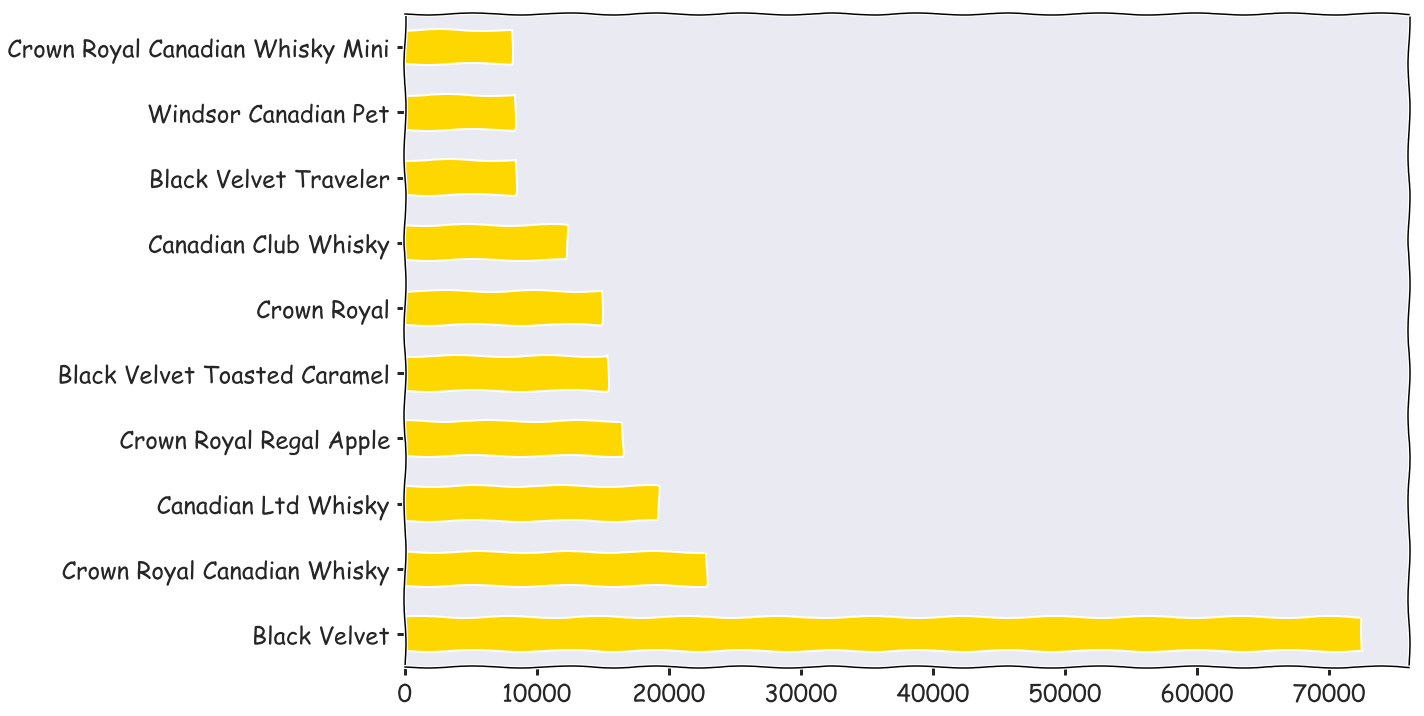

In [117]:
fig, ax = plt.subplots(figsize = (18,12))
df[df['Category Name'] == 'CANADIAN WHISKIES']['Item Description'].value_counts().head(10).plot(kind = 'barh', color = 'gold', fontsize = 24)

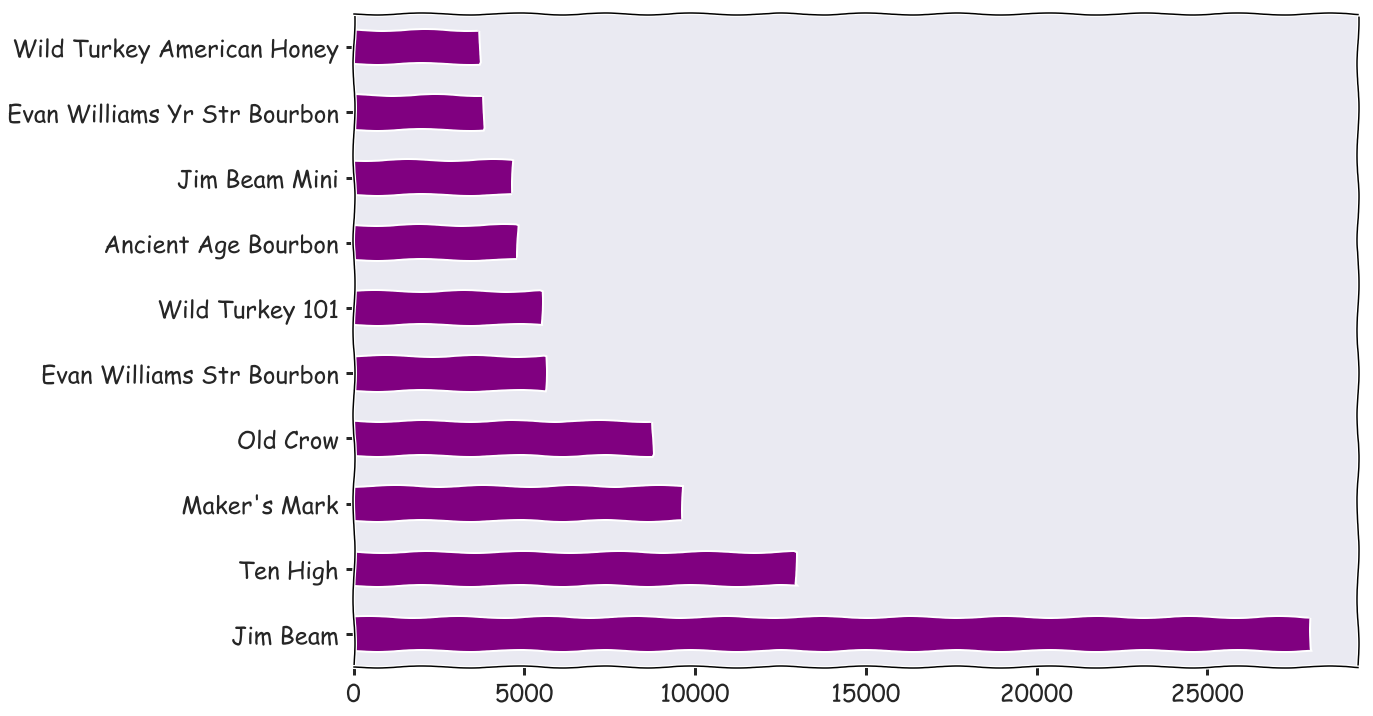

In [31]:
fig, ax = plt.subplots(figsize = (18,12))
df[df['Category Name'] == 'STRAIGHT BOURBON WHISKIES']['Item Description'].value_counts().head(10).plot(kind = 'barh', color = 'purple', fontsize = 24)

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


In [ ]:
# top 5 stores with highest total sales are:
# DES MOINES 	2633 	12282646.26
#             4829 	11085530.53
# IOWA CITY 	2512 	5206377.22
# CEDAR RAPIDS 	3385 	4759187.79
# WINDSOR HEIGHTS 	3420 	4018414.55


# The average number of bottles sold by store per transaction was 10 bottles, there was a heavy positive skew though

# average retail cost was 14.7 - averate store cost 9.8 = 4.9$ margins on each bottle sold

# vodka 80 proof, canadian whiskeys, and straight bourbon whiskies were the most popular type of liquors
# Haweye vodka, black velvet, and Jim bean were the top sellers in those respective categories


# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [57]:
#for our geographic location lets just use data from 2015 since new stores will have sales
df_2015 = df.loc[df['Date'].dt.year == 2015]


In [58]:
target = df_2015.groupby('Store Number')[['Sale (Dollars)']].sum().sort_values(by = 'Sale (Dollars)',ascending = False).reset_index()
target.head()

,Store Number,Sale (Dollars)
0,2633,9839393.08
1,4829,8742779.31
2,2512,4155665.47
3,3385,3947176.01
4,3420,3422351.55


In [121]:
#sum sales from jan to march 2015
mask = (df_2015['Date'] >= '2015-01-05') & (df_2015['Date'] <= '2015-03-31')
X = df_2015[mask].groupby('Store Number')[['Sale (Dollars)']].sum().reset_index()
X.rename(columns = {'Sale (Dollars)':'Jan to March Sales'}, inplace = True)

In [122]:
X.head()

,Store Number,Jan to March Sales
0,2106,337166.53
1,2113,22351.86
2,2130,277764.46
3,2152,16805.11
4,2178,54411.42


In [123]:
len(target), len(X)

(1283, 1283)

In [124]:
#before we add features, lets see why the length of our target and length of X are different
target = target[target['Store Number'].isin(X['Store Number'])]

In [125]:
#adding average bottle retail, average bottle cost, and total volume sold features to my X (predictors)
bottles_sum = df.groupby('Store Number')[['Bottles Sold']].mean().reset_index()
X = X.merge( bottles_sum, how = 'left', on = ('Store Number'))
X = X.merge((df.groupby('Store Number')[['State Bottle Retail']].mean().reset_index()),
            how = 'left', on = ('Store Number'))
X = X.merge((df.groupby('Store Number')[['State Bottle Cost']].mean().reset_index()),
            how = 'left', on = ('Store Number'))
X =X.merge((df.groupby('Store Number')[['Volume Sold (Liters)']].mean().reset_index()),
           how = 'left', on = ('Store Number'))

In [126]:
#renaming columns
X.rename(columns = {'State Bottle Cost':'Avg Bottle Cost',
                    'State Bottle Retail':'Avg Bottle Retail',
                    'Volume Sold (Liters)':'Avg Volume Sold (Liters)',
                   'Bottles Sold':'Avg Bottles Sold'},
         inplace = True)

In [127]:
X.head(10)

,Store Number,Jan to March Sales,Avg Bottles Sold,Avg Bottle Retail,Avg Bottle Cost,Avg Volume Sold (Liters)
0,2106,337166.53,19.514209,16.126917,10.744967,18.355608
1,2113,22351.86,4.667047,15.963609,10.632919,4.623090
2,2130,277764.46,18.523256,15.386269,10.251927,16.787416
3,2152,16805.11,4.024110,13.139489,8.742015,4.195431
4,2178,54411.42,7.677192,15.127811,10.068841,8.070549
5,2190,255939.81,8.285090,18.142489,12.086029,5.056179
6,2191,319020.69,13.863643,17.125039,11.411090,14.230320
7,2200,45340.33,4.001452,17.425620,11.606667,4.477271
8,2205,57849.23,6.048682,15.036204,10.013212,5.043834
9,2228,51031.04,5.333907,15.000341,9.989567,5.354428


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

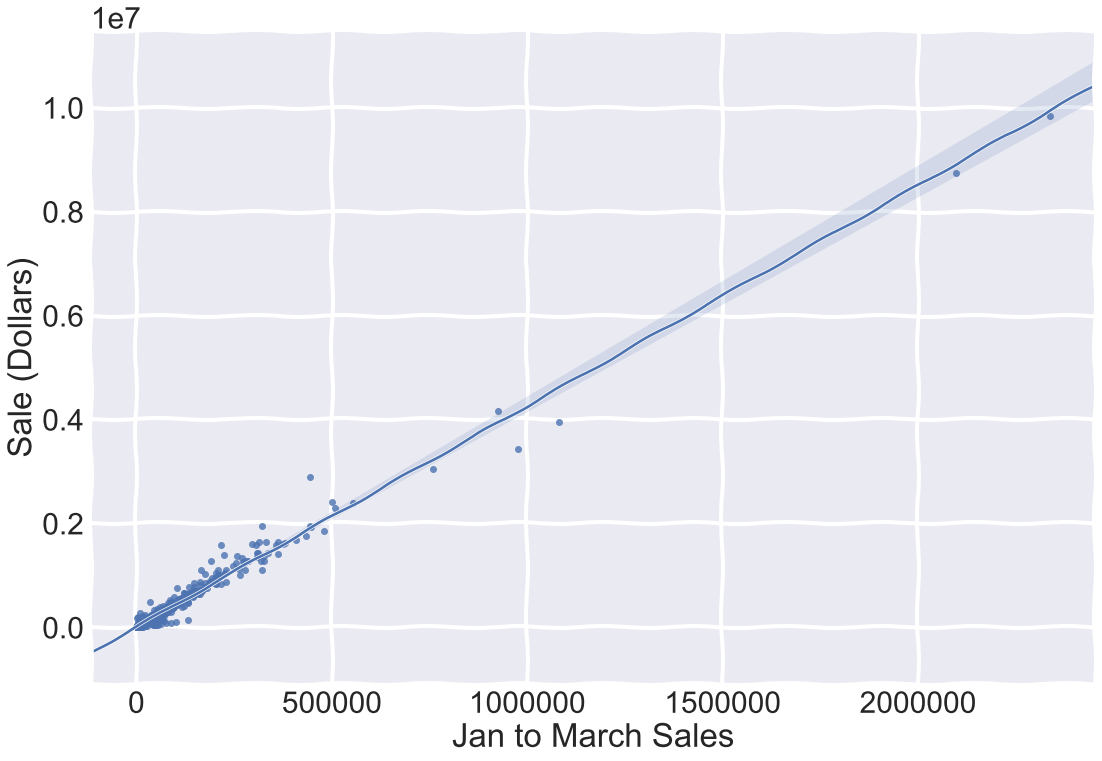

In [138]:
fig, ax = plt.subplots(figsize = (18,12))
sns.set(font_scale=3)
sns.regplot(x = 'Jan to March Sales', y = 'Sale (Dollars)', data = X.merge(target, how = 'left', on = ('Store Number')))

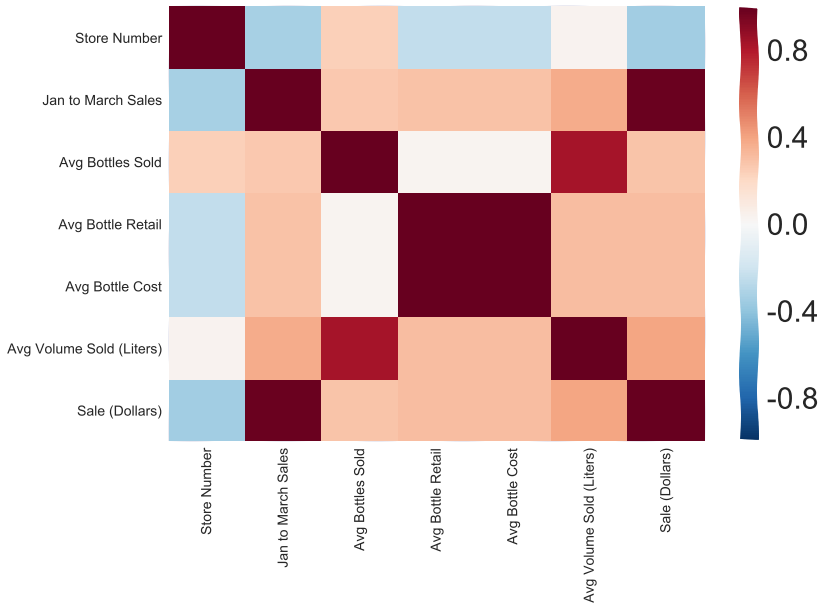

In [135]:
import numpy as np #still cant believe i hadnt imported it before
mean_corr = X.merge(target, how = 'left', on = ('Store Number')).corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(12,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
#mask = np.zeros_like(mean_corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation = 'vertical')
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [136]:
mean_corr

,Store Number,Jan to March Sales,Avg Bottles Sold,Avg Bottle Retail,Avg Bottle Cost,Avg Volume Sold (Liters),Sale (Dollars)
Store Number,1.000000,-0.331292,0.242105,-0.243479,-0.243026,0.036661,-0.345518
Jan to March Sales,-0.331292,1.000000,0.268871,0.291059,0.291266,0.374776,0.990398
Avg Bottles Sold,0.242105,0.268871,1.000000,0.029339,0.029801,0.832051,0.281944
Avg Bottle Retail,-0.243479,0.291059,0.029339,1.000000,0.999996,0.306177,0.310664
Avg Bottle Cost,-0.243026,0.291266,0.029801,0.999996,1.000000,0.305964,0.310872
Avg Volume Sold (Liters),0.036661,0.374776,0.832051,0.306177,0.305964,1.000000,0.395640
Sale (Dollars),-0.345518,0.990398,0.281944,0.310664,0.310872,0.395640,1.000000


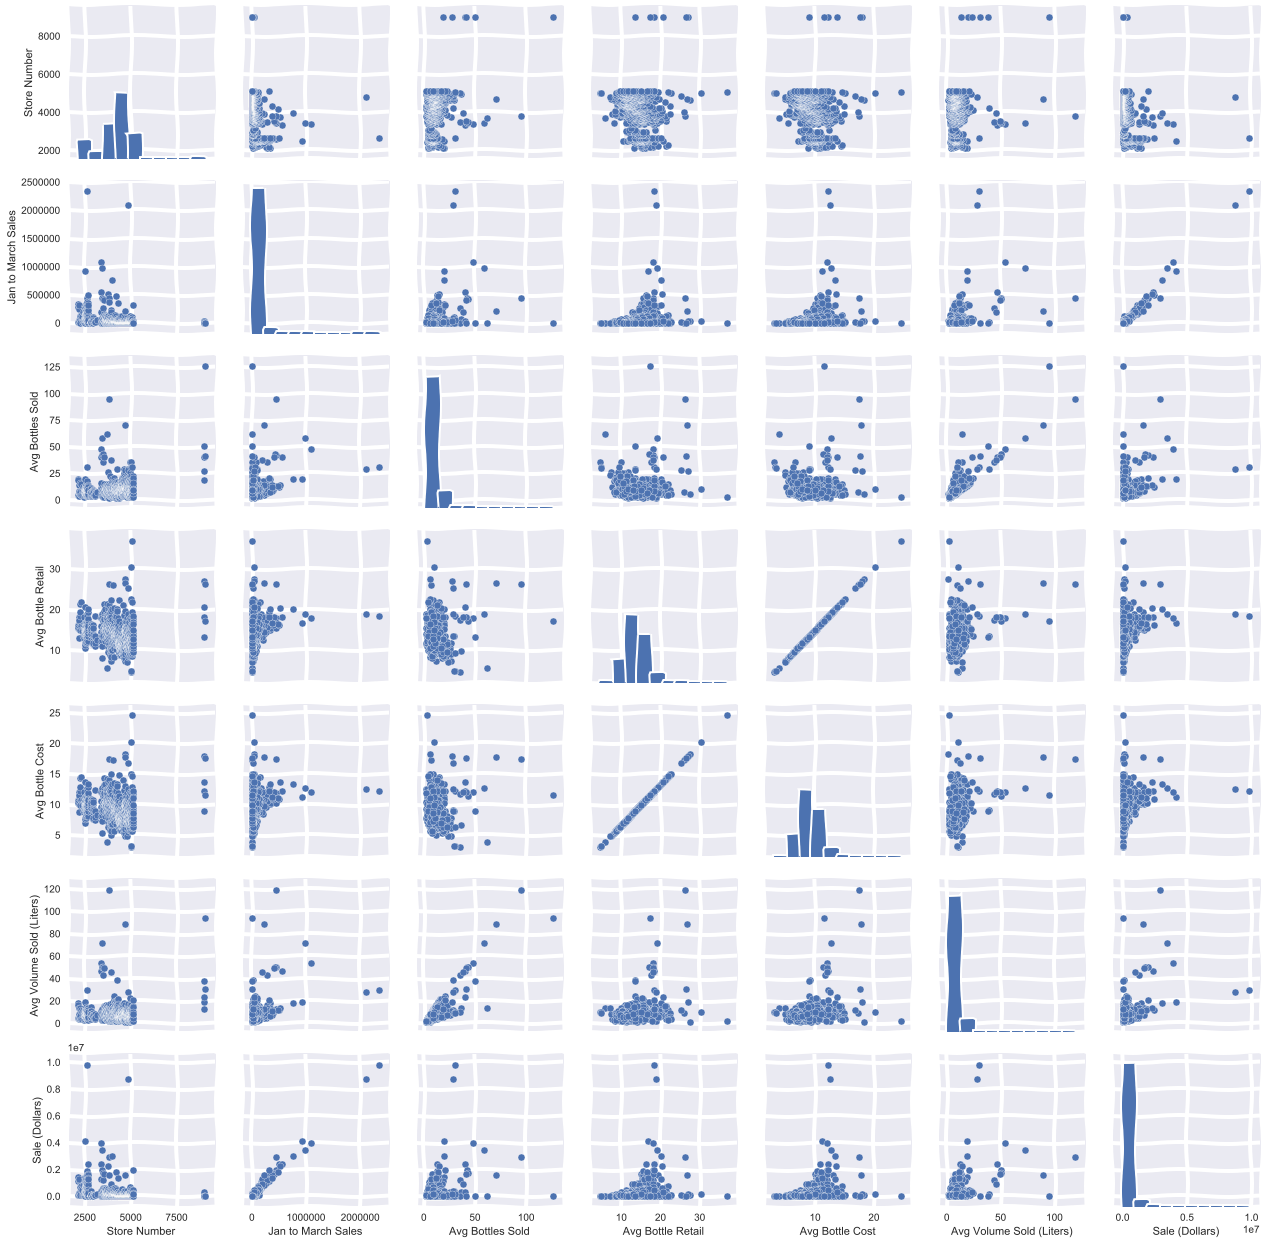

In [142]:
#this takes a while to run, it just visualizes the above correlation matrix
sns.set()
sns.pairplot(X.merge(target, how = 'left', on = ('Store Number')))

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [143]:
target.sort_values(by = 'Store Number', inplace = True)

In [144]:
X.sort_values(by = 'Store Number', inplace = True)

In [145]:
X.drop('Store Number', axis = 'columns', inplace = True)

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)

In [147]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split


X_train, X_test, y_train, y_test = train_test_split(Xs,
                                                    target['Sale (Dollars)'],
                                                    test_size = .25,
                                                    random_state = 42)

lr = LinearRegression()

scores = cross_val_score(lr, X_train, y_train, cv = 10)
scores.mean()


0.96593097488672408

In [148]:
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test) #im gonna plot this vs y_test
lr.score(X_test, y_test)


0.97790081290698494

In [149]:
alpha_range = 10.**np.arange(-2, 3)
ridgecv = RidgeCV(alphas = alpha_range, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train,y_train)
alpha = ridgecv.alpha_
print(alpha)

10.0


In [150]:
ridge = Ridge(alpha = alpha)#using the alpha we found using RidgeCV
ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 10)
ridge_scores.mean()

0.96509871690047522

In [151]:
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge.score(X_test, y_test)
#ridge was pretty good, ,a fraction of a percent better

0.98005592441245293

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

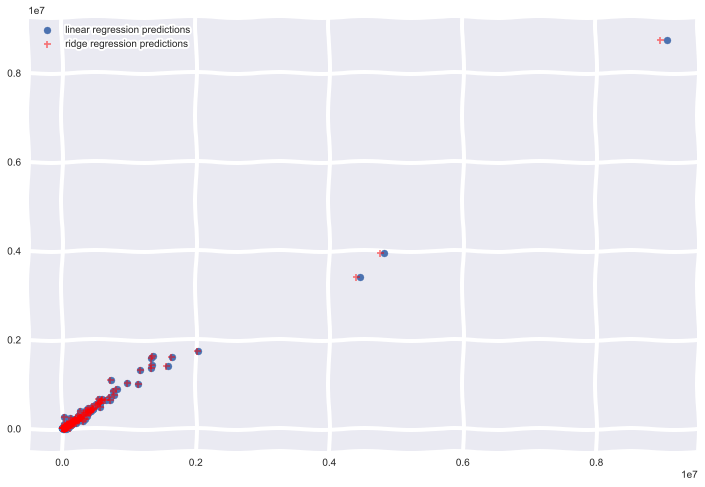

In [152]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(lr_predictions, y_test, label = 'linear regression predictions')
ax.scatter(ridge_predictions, y_test, color = 'red', alpha = .5, marker = '+', label = 'ridge regression predictions')
plt.legend()

In [153]:
# lets throw in 2016 data and predict the 2016 sales
#adding average bottle retail, average bottle cost, and total volume sold features to my X (predictors)
#remember though OUR MODEL WAS TRAINED ON FULL YEAR OF SUMS, SO we divide by 4 for the sum columns.
df_2016 = df.loc[df['Date'].dt.year == 2016]

X_2016 = df_2016.groupby('Store Number')[['Sale (Dollars)']].sum().reset_index()
X_2016.rename(columns = {'Sale (Dollars)':'Jan to March Sales'}, inplace = True)

X_2016 = X_2016.merge( (df_2016.groupby('Store Number')[['Bottles Sold']].mean()).reset_index(),
            how = 'left', on = ('Store Number'))
X_2016 = X_2016.merge((df_2016.groupby('Store Number')[['State Bottle Retail']].mean().reset_index()),
            how = 'left', on = ('Store Number'))
X_2016 = X_2016.merge((df_2016.groupby('Store Number')[['State Bottle Cost']].mean().reset_index()),
            how = 'left', on = ('Store Number'))
X_2016 = X_2016.merge( (df_2016.groupby('Store Number')[['Volume Sold (Liters)']].mean()).reset_index(),
           how = 'left', on = ('Store Number'))
X_2016

,Store Number,Jan to March Sales,Bottles Sold,State Bottle Retail,State Bottle Cost,Volume Sold (Liters)
0,2106,337804.05,19.206672,15.718779,10.475720,18.126892
1,2113,21736.63,4.333333,15.965471,10.638728,4.091781
2,2130,306942.27,19.087584,15.243263,10.159480,17.490616
3,2152,13752.24,3.524430,14.272020,9.500684,3.724821
4,2178,58939.90,7.577629,15.487229,10.315693,7.690551
5,2190,332979.03,7.991111,19.315638,12.872968,5.266067
6,2191,302592.88,12.606711,17.174584,11.446128,12.866262
7,2200,55315.23,4.128587,17.303486,11.529957,4.567014
8,2228,42398.57,5.489552,15.053836,10.029000,5.212881
9,2233,56241.57,8.524896,18.831618,12.547220,8.989896


In [154]:
X_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1319
Data columns (total 6 columns):
Store Number            1320 non-null int64
Jan to March Sales      1320 non-null float64
Bottles Sold            1320 non-null float64
State Bottle Retail     1320 non-null float64
State Bottle Cost       1320 non-null float64
Volume Sold (Liters)    1320 non-null float64
dtypes: float64(5), int64(1)
memory usage: 72.2 KB


In [155]:
#dropping stores from our predictor matrix, storing stores in a stores_2016 dataframe which we'll use later to display predicted sales
stores_2016 = X_2016.loc[:,['Store Number']].copy()
X_2016.drop('Store Number', axis = 'columns', inplace = True)

In [156]:
Xs_2016 = scaler.transform(X_2016)

predictions_2016 = lr.predict(Xs_2016)

In [157]:
stores_2016['2016 Sales'] = predictions_2016

In [158]:
stores_2016.head(20)

,Store Number,2016 Sales
0,2106,1.500007e+06
1,2113,9.939981e+04
2,2130,1.365142e+06
3,2152,4.937831e+04
4,2178,2.648661e+05
5,2190,1.434505e+06
6,2191,1.335979e+06
7,2200,2.466910e+05
8,2228,1.875647e+05
9,2233,2.653044e+05


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [159]:
predictions_2016.mean() - target['Sale (Dollars)'].mean()

9215.637315893895

In [129]:
#on average thats the difference in yearly sales for iowa liquor stores from 2016 to 2015 was 9,215, 
#thats a $9,215 per store on average increase in yearly sales in 2016